# Anomaly Detection

### Example of Application on Normalized Battery Capacity Data

Isolation Forest Method

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Loading the data from files
normalized_capacity_training_file = 'Normalized Capacity Training Data.xlsx'
normalized_capacity_testing_file = 'Normalized Capacity Testing Data.xlsx.xlsx'
normalized_capacity_training_data = pd.read_excel(normalized_capacity_training_file)
normalized_capacity_testing_data = pd.read_excel(normalized_capacity_testing_file)

# Training an Isolation Forest model on the normalized capacity training data
isolation_forest = IsolationForest(contamination='auto', random_state=42)
isolation_forest.fit(normalized_capacity_training_data)

# Predicting anomalies in the normalized capacity testing data
anomalies = isolation_forest.predict(normalized_capacity_testing_data)

# Anomalies are marked with -1, normal points with 1
normalized_capacity_testing_data['anomaly'] = anomalies

# Displaying rows that are predicted to be anomalies
anomalous_data = normalized_capacity_testing_data[normalized_capacity_testing_data['anomaly'] == -1]

# Summary of the results
total_rows = normalized_capacity_testing_data.shape[0]
anomalous_rows_count = anomalous_data.shape[0]
normal_rows_count = total_rows - anomalous_rows_count
summary = f"Out of {total_rows} rows in the testing data, {anomalous_rows_count} are detected as anomalies and {normal_rows_count} are normal."

print(summary)
print("\nAnomalous rows in normalized capacity testing data:")
print(anomalous_data)


Out of 500 rows in the testing data, 473 are detected as anomalies and 27 are normal.

Anomalous rows in normalized capacity testing data:
       Cell A    Cell B    Cell C    Cell D    Cell E    Cell F  anomaly
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       -1
1    0.999216  0.999243  0.999315  0.999383  0.999559  0.999657       -1
2    0.998092  0.998141  0.998152  0.998389  0.998745  0.998661       -1
3    0.997206  0.997109  0.997228  0.997635  0.998101  0.997803       -1
4    0.996253  0.996283  0.996440  0.996744  0.997694  0.997082       -1
..        ...       ...       ...       ...       ...       ...      ...
495  0.640988  0.683074  0.753132  0.783019  0.820763  0.820435       -1
496  0.639150  0.674968  0.752840  0.782474  0.821649  0.820356       -1
497  0.627647  0.670437  0.751267  0.781404  0.821572  0.821097       -1
498  0.623800  0.668640  0.750509  0.780764  0.825902  0.825720       -1
499  0.620841  0.668191  0.750393  0.780509  0.826056  0.8

Z-Score Method

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Loading the data from files
normalized_capacity_training_file = 'Normalized Capacity Training Data.xlsx'
normalized_capacity_testing_file = 'Normalized Capacity Testing Data.xlsx.xlsx'
normalized_capacity_training_data = pd.read_excel(normalized_capacity_training_file)
normalized_capacity_testing_data = pd.read_excel(normalized_capacity_testing_file)

# Calculating the mean and standard deviation for each column in the training data
training_means = normalized_capacity_training_data.mean()
training_stds = normalized_capacity_training_data.std()

# Applying Z-score for each value in the testing data
z_scores = (normalized_capacity_testing_data - training_means) / training_stds

# Defining a threshold for anomaly detection
threshold = 3

# Anomaly Detection (values with Z-score > threshold)
anomalies = z_scores.abs() > threshold

# Adding a column for anomaly detection in the testing data
normalized_capacity_testing_data['anomaly'] = anomalies.any(axis=1)

# Summary of the results
total_rows = normalized_capacity_testing_data.shape[0]
anomalous_rows_count = normalized_capacity_testing_data['anomaly'].sum()
normal_rows_count = total_rows - anomalous_rows_count
summary = f"Out of {total_rows} rows in the testing data, {anomalous_rows_count} rows have at least one anomaly in any column."

print(summary)
print("\nTesting Data with Anomaly Flag:")
print(normalized_capacity_testing_data)


Out of 500 rows in the testing data, 179 rows have at least one anomaly in any column.

Testing Data with Anomaly Flag:
       Cell A    Cell B    Cell C    Cell D    Cell E    Cell F  anomaly
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000    False
1    0.999216  0.999243  0.999315  0.999383  0.999559  0.999657    False
2    0.998092  0.998141  0.998152  0.998389  0.998745  0.998661    False
3    0.997206  0.997109  0.997228  0.997635  0.998101  0.997803    False
4    0.996253  0.996283  0.996440  0.996744  0.997694  0.997082    False
..        ...       ...       ...       ...       ...       ...      ...
495  0.640988  0.683074  0.753132  0.783019  0.820763  0.820435     True
496  0.639150  0.674968  0.752840  0.782474  0.821649  0.820356     True
497  0.627647  0.670437  0.751267  0.781404  0.821572  0.821097     True
498  0.623800  0.668640  0.750509  0.780764  0.825902  0.825720     True
499  0.620841  0.668191  0.750393  0.780509  0.826056  0.825871     True

[50

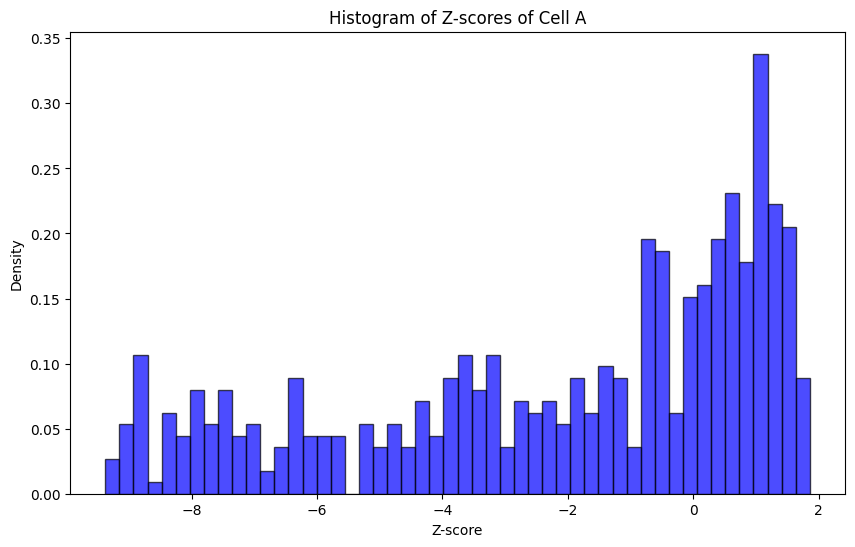

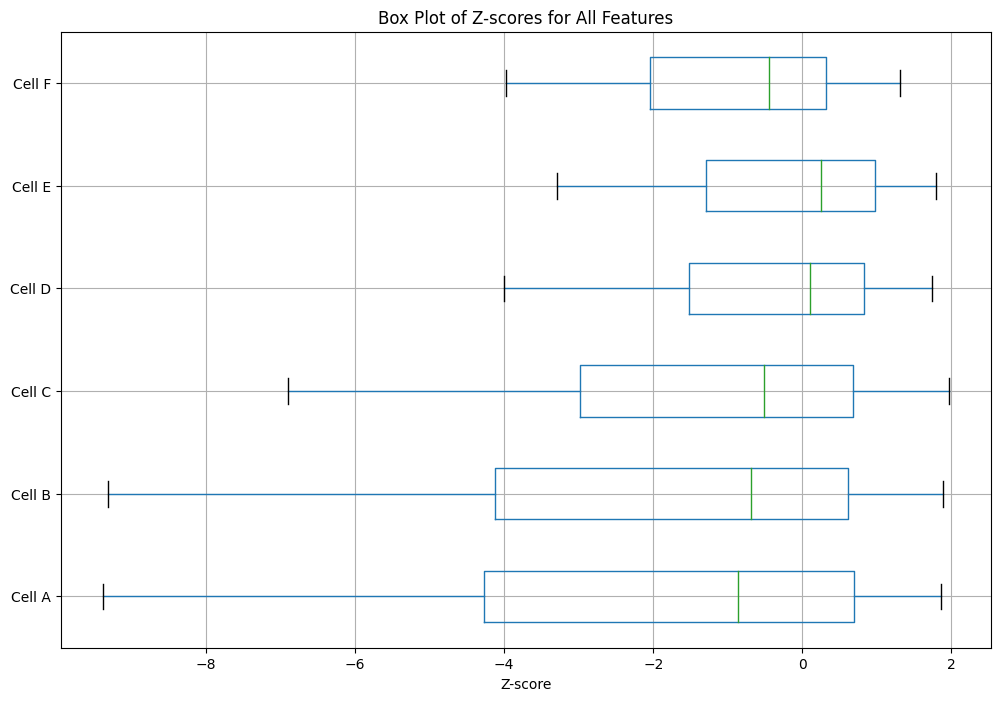

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(z_scores['Cell A'], bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Z-scores of Cell A')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(12, 8))
z_scores.boxplot(vert=False)
plt.title('Box Plot of Z-scores for All Features')
plt.xlabel('Z-score')
plt.show()




       Cell A    Cell B    Cell C    Cell D    Cell E    Cell F
0    1.860360  1.890357  1.961084  1.740558  1.788428  1.316164
1    1.837134  1.865120  1.936794  1.724433  1.775930  1.306063
2    1.803810  1.828413  1.895501  1.698454  1.752857  1.276769
3    1.777555  1.794000  1.862710  1.678746  1.734591  1.251516
4    1.749280  1.766469  1.834776  1.655454  1.723055  1.230303
..        ...       ...       ...       ...       ...       ...
495 -8.781121 -8.672197 -6.798761 -3.931576 -3.292352 -3.966623
496 -8.835584 -8.942356 -6.809099 -3.945821 -3.267249 -3.968919
497 -9.176543 -9.093385 -6.864927 -3.973782 -3.269432 -3.947134
498 -9.290593 -9.153276 -6.891806 -3.990517 -3.146678 -3.811137
499 -9.378280 -9.168248 -6.895942 -3.997168 -3.142313 -3.806676

[500 rows x 6 columns]
